<a href="https://colab.research.google.com/github/JigneshJK/Multiple_Regression_Case_Study/blob/main/JK_Multiple_Regression_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Regression Case Study**

## **Magazine Advertising**

What factors influence the price of advertisements in magazines? Suppose you are part of a team of consultants hired by a retail clothing company wishing to place advertisements in at least one magazine. They are curious about what types of costs they can expect for magazines with different readership bases, so they most effectively utilize their advertising budget. Your team has collected a dataset of 44 consumer magazines and has found that the mean cost for a one-page advertisement is $82,386, but the standard deviation is $46,191.

What number should be used to best estimate the advertising costs?

Your team realizes that there may be many variables affecting cost of a one-page advertisement. You have augmented the original dataset of 44 magazines by measuring more characteristics of the magazines and their audiences that may be useful in understanding the one-page advertisement costs better. The variables are the following:

• Magazine Name <br>
• Cost of a four-color, one-page ad <br>
• Circulation (projected, in thousands) <br>
• Percent male among the predicted readerships <br>
• Median household income of readership

Your goal is to analyze the data using Multiple Linear Regression methods and choose the best model to explain the differences in advertising costs between the different titles and then to predict what the retail clothing company should expect to pay for advertising in the different magazines.
Answer the following questions:
________________________________________________________________________________________________________________________________________________________________

**1. Examine the variables and their relationships to each other:**

a. First look at how each variable (all 4 of them) behaves on its own by creating histograms of each. Is there any apparent skewness in any of the graphs? Explain.

b. Now explore the linear relationship between page cost and each of the audience variables individually by constructing scatterplots of all three pairs. Do you see any strong relationships? Are they linear? Explain your answer.

In [5]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
import statistics
import math

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from termcolor import colored as cl
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
data=pd.read_csv("/content/Dataset.csv")
data.head(0)

,Magazine Name,pagecost,circ,percmale,medianincome


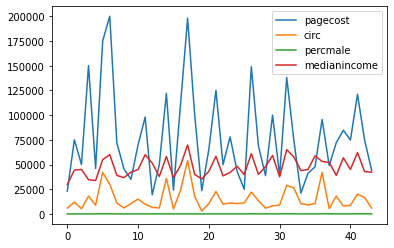

In [11]:
data.plot()

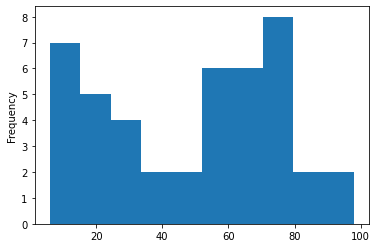

In [8]:
data['percmale'].plot(kind='hist')

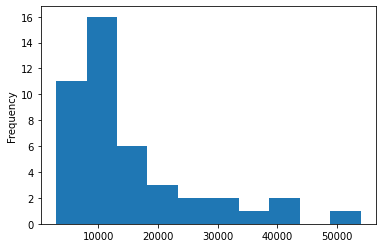

In [9]:
data['circ'].plot(kind='hist')

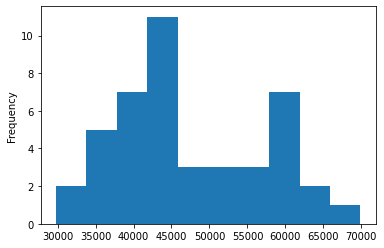

In [10]:
data['medianincome'].plot(kind='hist')

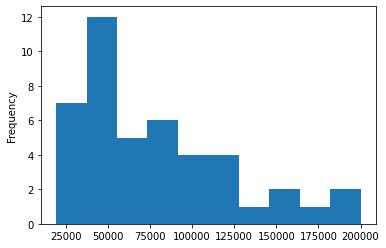

In [7]:
#a. How each variable (all 4 of them) behaves on its own by creating histograms of each
data['pagecost'].plot(kind='hist')

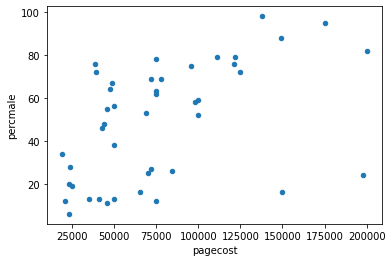

In [13]:
data.plot(kind='scatter',x='pagecost',y='percmale')

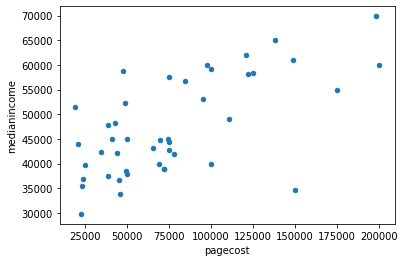

In [14]:
data.plot(kind='scatter',x='pagecost',y='medianincome')

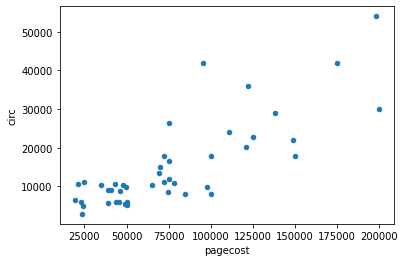

In [12]:
#b. Linear relationship between page cost and each of the audience variables individually by constructing scatterplots of all three pairs.
data.plot(kind='scatter',x='pagecost',y='circ')

**2. Perform a Multiple Linear Regression analysis using all the audience variables AND perform a residual analysis using the graphs.**

a. Is this multiple regression model useful? Provide statistical evidence to support your answer and where appropriate use a significance level of 5%.

b. What is the estimated regression equation?

c. Examine each of the audience variables individually to determine which are contributing significantly to the model. Which independent variables would you recommend keeping in the model? (Use a significance level of 5%.) [Note: do not eliminate any variable(s) at this stage.

In [15]:
#Determine pagecost
X1_var = data[['circ','percmale','medianincome']]
Y1_var = data['pagecost'] #dependent variable

sm_X1_var = sm.add_constant(X1_var)
mlr_model = sm.OLS(Y1_var, sm_X1_var)
mlr_reg = mlr_model.fit()
print(cl(mlr_reg.summary(), attrs = ['bold']))

                            OLS Regression Results                            
Dep. Variable:               pagecost   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     29.98
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           2.52e-10
Time:                        14:27:15   Log-Likelihood:                -509.35
No. Observations:                  44   AIC:                             1027.
Df Residuals:                      40   BIC:                             1034.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.964e+04   2.19e+04     -0.897   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**3. Often, when dealing with dependent variables that represent financial data (income, price, etc.), using the natural log of the dependent variable will help to alleviate problems that may be causing patterns in residuals/violations of the required conditions. Re-run the Multiple Regression analysis using the natural log of the page cost variable instead. Re-run the Regression using this new variable as the dependent variable against all 3 independent variables, again creating residual plot for this model.**

a. Is this new multiple regression model useful? Provide statistical evidence to support your answer. Does the new Regression model seem better that the previous ones? Why or why not?

b. Examine each of the audience variables individually to determine which are contributing significantly to the new model. Which audience variables would you recommend keeping in the new model? How does this compare to the results in question 2?

c. Evaluate the regression assumptions of linearity and homoscedasticity by assessing your new residual plot. Be specific about your evaluation and describe any suggestions you have for remedying any problems.


In [21]:
#Determine circ
X1_var = data[['pagecost','percmale','medianincome']]
Y1_var = data['circ'] #dependent variable

sm_X1_var = sm.add_constant(X1_var)
mlr_model = sm.OLS(Y1_var, sm_X1_var)
mlr_reg = mlr_model.fit()
print(cl(mlr_reg.summary(), attrs = ['bold']))

                            OLS Regression Results                            
Dep. Variable:                   circ   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     25.57
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           2.11e-09
Time:                        14:39:50   Log-Likelihood:                -449.38
No. Observations:                  44   AIC:                             906.8
Df Residuals:                      40   BIC:                             913.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5830.5559   5583.913     -1.044   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
#Determine medianincome
X1_var = data[['pagecost','percmale','circ']]
Y1_var = data['medianincome'] #dependent variable

sm_X1_var = sm.add_constant(X1_var)
mlr_model = sm.OLS(Y1_var, sm_X1_var)
mlr_reg = mlr_model.fit()
print(cl(mlr_reg.summary(), attrs = ['bold']))

                            OLS Regression Results                            
Dep. Variable:           medianincome   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     12.05
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           9.26e-06
Time:                        14:41:58   Log-Likelihood:                -452.12
No. Observations:                  44   AIC:                             912.2
Df Residuals:                      40   BIC:                             919.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.463e+04   2508.951     13.802      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**4. Since you have switched to using the natural log of the Pagecost variable, you now need to recreate scatter plots using this as your dependent variable and each of the 3 independent variables on the x-axis (the result will be 3 separate scatterplots). The circulation variable has the most noticeable relationship to the natural log of Pagecost. This is a logarithmic type of relationship; to transform this curved relationship into a linear kind, a natural log transformation needs to be applied to the circulation variable. Do the transformation.**

a. If natural log of independent variable – Circulation and median income is taken, and Page cost and percentage of men is not transformed, examine how the independent variables are now individually contributing to determine page cost.

b. Apply Z score analysis on all the independent variables and check if an outlier exists in your data and if found treat those outliers.

In [20]:
data.head()

,Magazine Name,pagecost,circ,percmale,medianincome
0,Business India,23000,5900,6,29800
1,Business Today,75000,12000,12,44300
2,children's magazine,50000,5210,13,45000
3,CTO,150000,18000,16,34600
4,New Horizon,46000,8900,55,33800


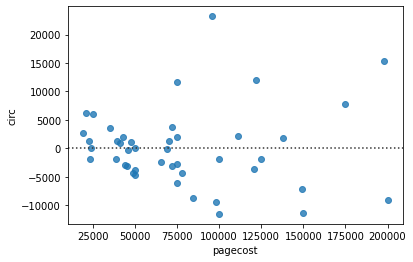

In [18]:
#residual analysis
sns.residplot(x='pagecost', y='circ', data=data)
plt.show()

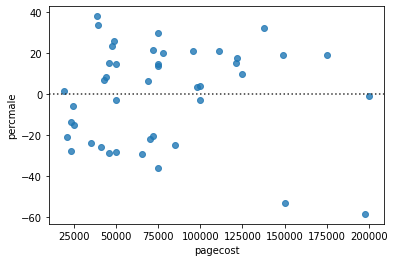

In [19]:
sns.residplot(x='pagecost', y='percmale', data=data)
plt.show()

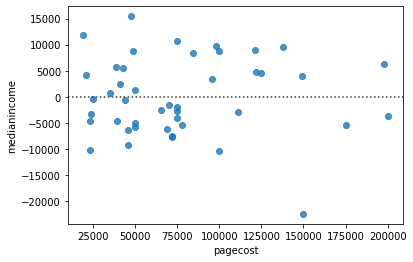

In [23]:
sns.residplot(x='pagecost', y='medianincome', data=data)
plt.show()

**Executive Summary:**

You are given the task of summarizing your findings for the board of directors of the retail clothing company. Since they are not all very well-versed in Regression techniques, you will need to explain things in easy-to-understand terms.

Within the summary, explain to them why you would recommend/not recommend using Linear Regression model to best forecast the cost of one-page advertisements.

Also, describe what this model indicates (very briefly) about the relationship between the page cost and your chosen variables.

PS – The Dataset has been created to highlight the various concepts of Regression and to check your understanding in it. It might be a possibility that your model is not performing well with the given Dataset. In this condition, please specify your understanding on the data and if you feel your final model does not sufficiently explain page cost, include your recommendations for improving it.